# Belief Propagation Sandbox

For testing particle belief propagation methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.sim import spider

%matplotlib inline

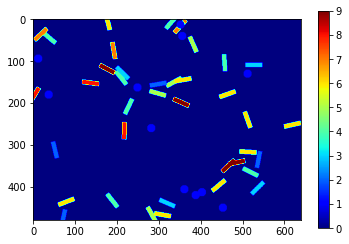

In [2]:
N_RECT = 30
N_CIRC = 10

scene = spider.SpiderScene(N_RECT, N_CIRC)
obs = scene.observation()

plt.imshow(obs, cmap=plt.get_cmap("jet"))
plt.colorbar()

In [3]:
from src.sim import likelihoods

img = scene.image(obs)
spi_obs = scene.spider.observation()
score = likelihoods.spider_ave_score(obs, scene.spider)

noisy_spider = spider.Spider(scene.spider.x, scene.spider.y)
noisy_spi_obs = noisy_spider.observation()
noisy_score = likelihoods.spider_ave_score(obs, noisy_spider)

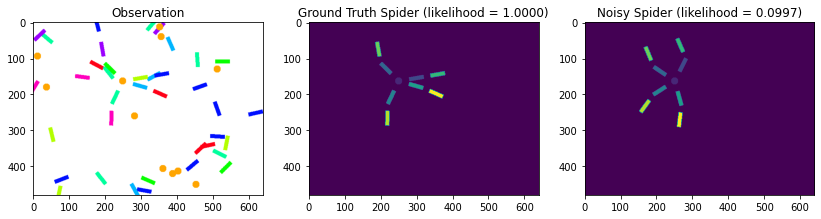

In [4]:
plt.figure(figsize=(14,8))
plt.subplot(1, 3, 1)
plt.title("Observation")
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.title("Ground Truth Spider (likelihood = {:.4f})".format(score))
plt.imshow(spi_obs)
plt.subplot(1, 3, 3)
plt.title("Noisy Spider (likelihood = {:.4f})".format(noisy_score))
plt.imshow(noisy_spi_obs)

## Particle Belief Propagation

In [5]:
from src.sim import graph

N_PARTICLES = 150
N_ITERS = 20

g = graph.SpiderGraph(N_PARTICLES)

In [6]:
def plot_output(bel, est, i):
    plt.figure(figsize=(14,8))
    plt.subplot(1, 2, 1)
    plt.title("Belief at iteration {}".format(i + 1))
    plt.imshow(bel)
    plt.subplot(1, 2, 2)
    plt.title("Estimate at iteration {}".format(i + 1))
    plt.imshow(est)

In [7]:
# Run iterations.
def run_inference(g, obs, n_iters, scene=None):
    ious = []
    for i in range(n_iters):
        print("Running iteration:", i + 1)
        g.update_messages(obs)
        g.update_belief(obs)

        bel = g.marginals()
        est = g.estimate()

        g.resample()
        g.jitter()

        ious.append(scene.iou(est))
        print("IOU: {:.4f}".format(ious[-1]))

        if scene:
            bel = scene.display_belief(bel, img)
            est = scene.display_estimate(est, img)
            plot_output(bel, est, i)
            plt.show()

    return ious

## Sum-product BP

First, initialize on the observation.

In [11]:
# g.init_random()
g.init_obs(obs)

Visualize the initial belief.

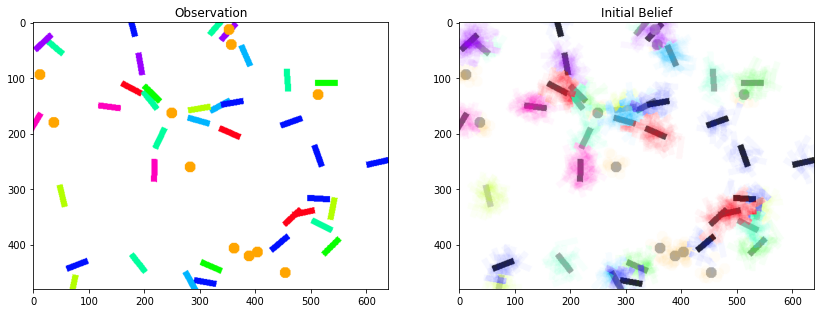

In [12]:
initial_bel = scene.display_belief(g.marginals(), img)

plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.title("Observation")
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title("Initial Belief")
plt.imshow(initial_bel)

Now run the inference.

Running iteration: 1
IOU: 0.2902


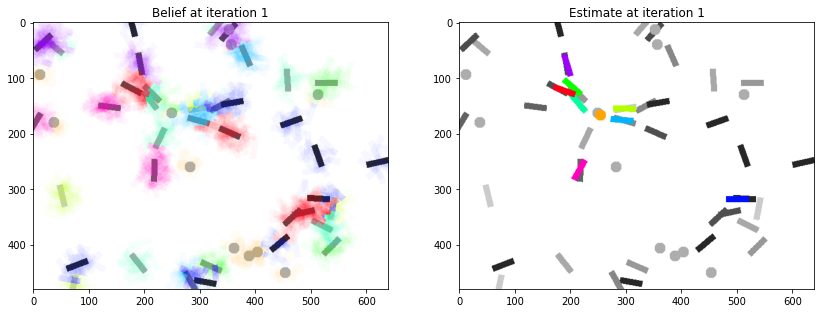

Running iteration: 2
IOU: 0.4070


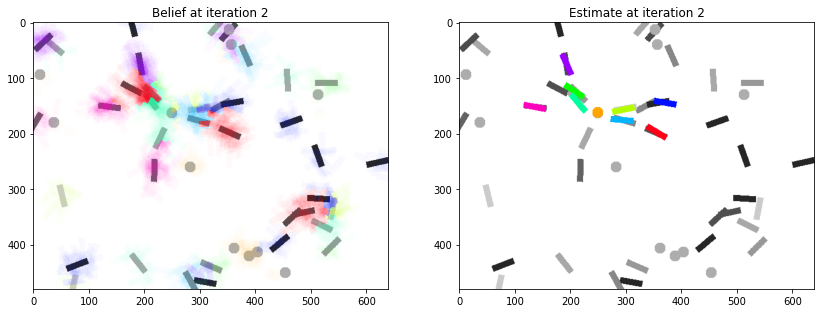

Running iteration: 3
IOU: 0.4302


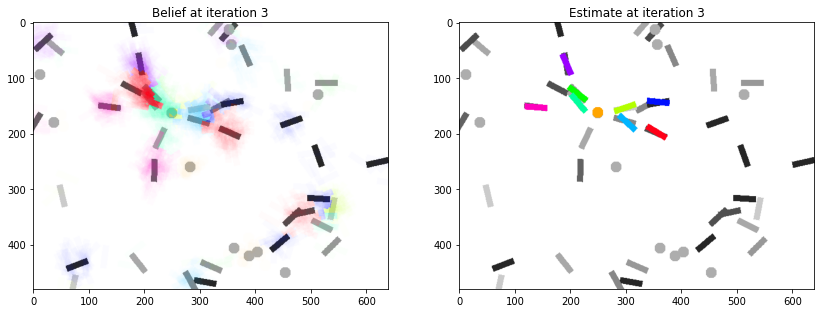

Running iteration: 4
IOU: 0.4547


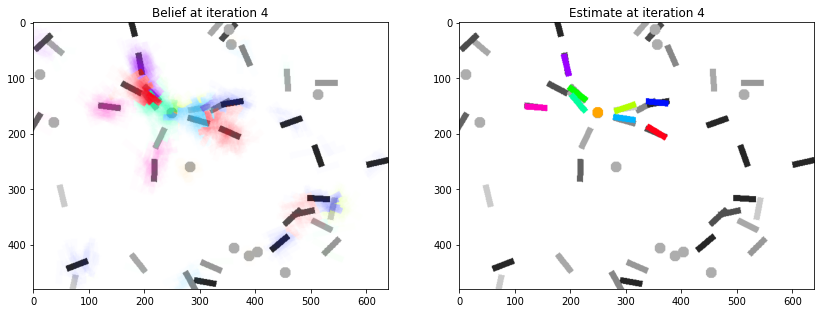

Running iteration: 5
IOU: 0.5609


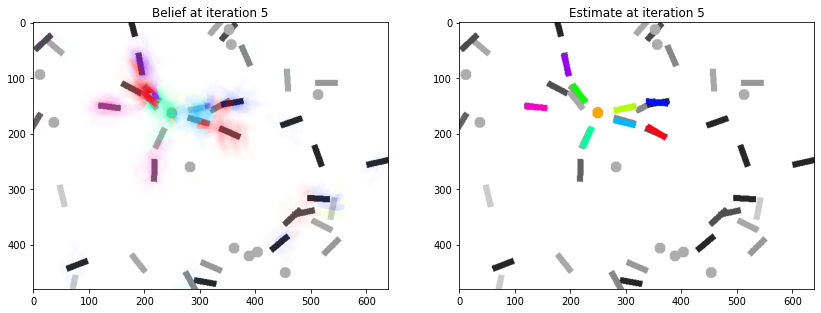

Running iteration: 6
IOU: 0.5763


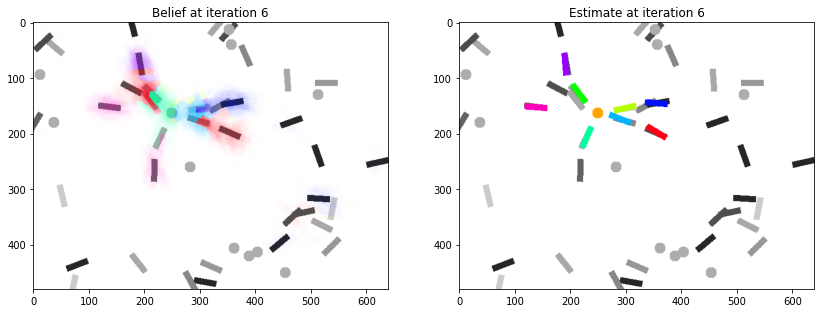

Running iteration: 7
IOU: 0.6251


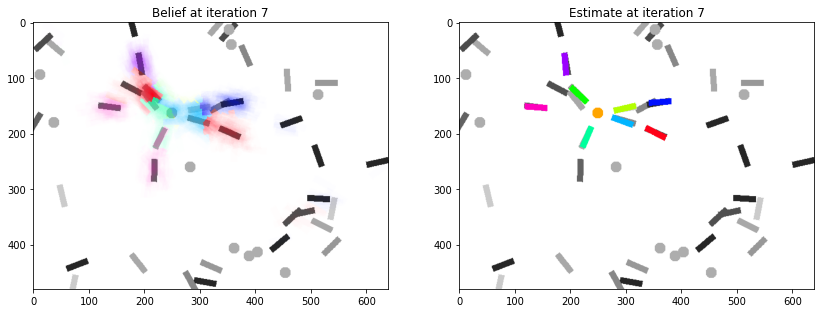

Running iteration: 8
IOU: 0.6684


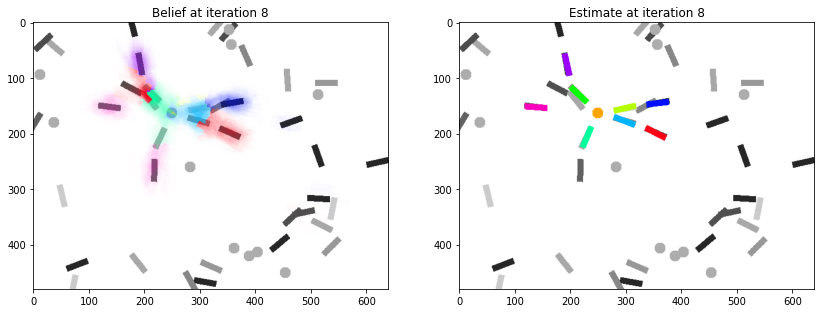

Running iteration: 9
IOU: 0.6831


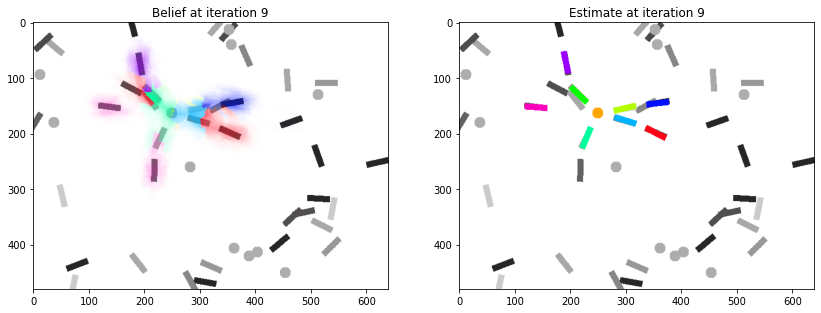

Running iteration: 10
IOU: 0.6900


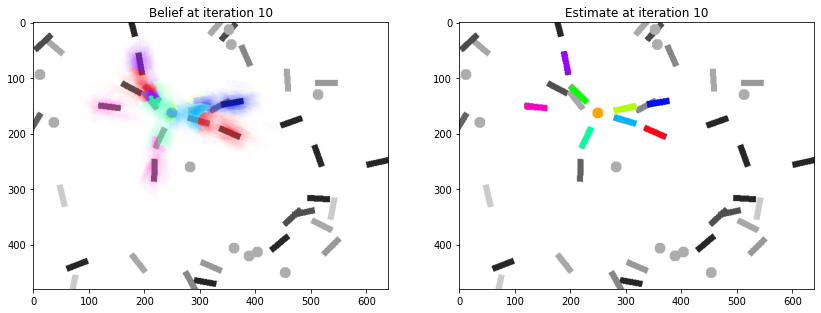

Running iteration: 11
IOU: 0.8419


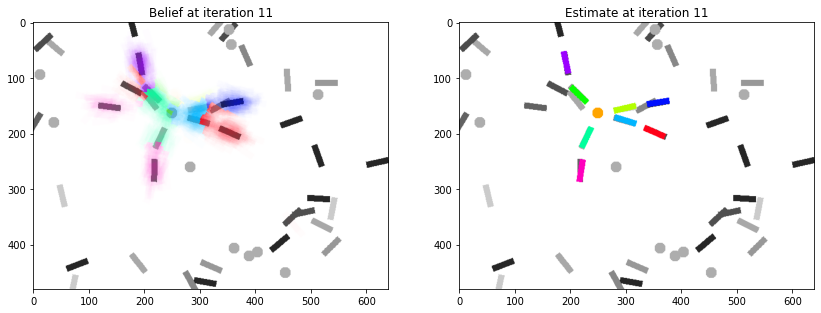

Running iteration: 12
IOU: 0.8419


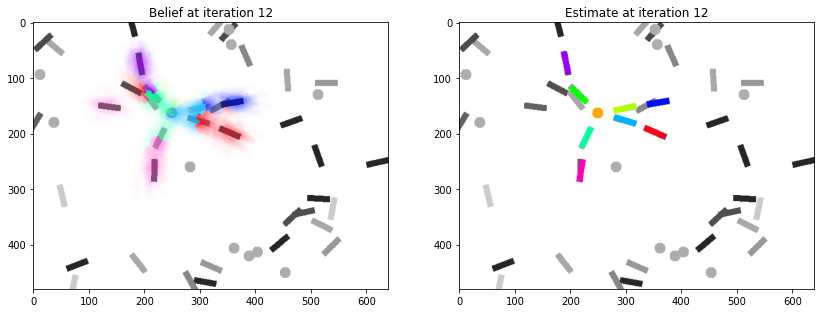

Running iteration: 13
IOU: 0.8543


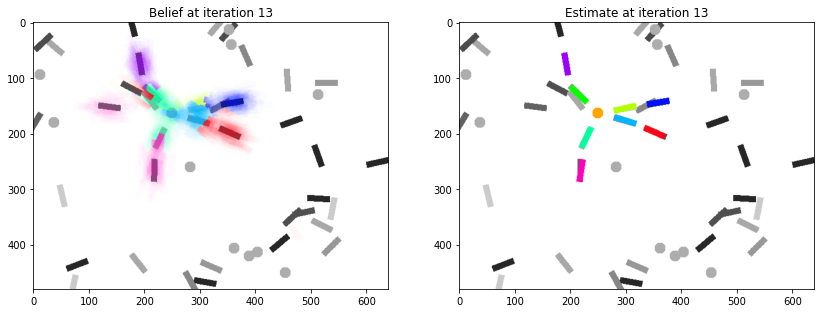

Running iteration: 14
IOU: 0.8755


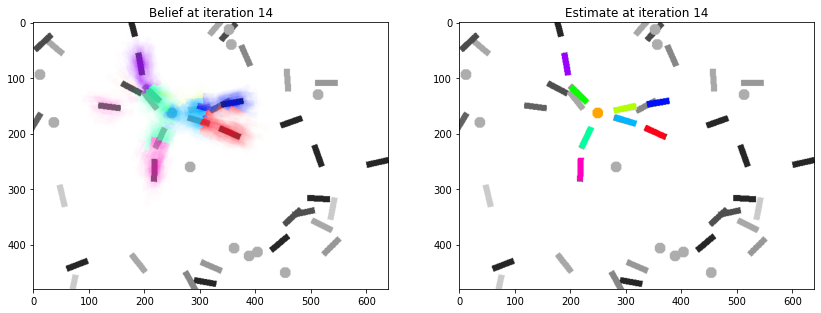

Running iteration: 15
IOU: 0.8755


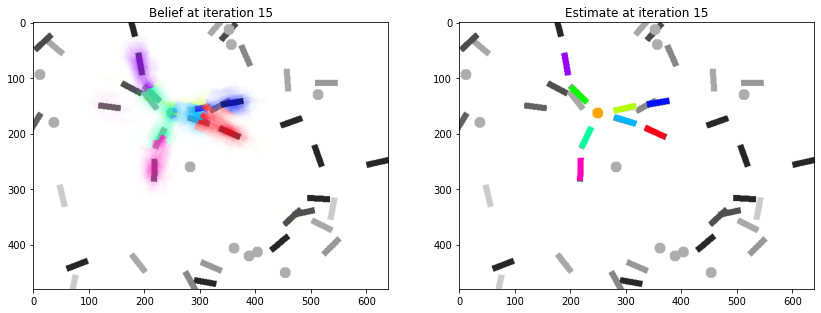

Running iteration: 16
IOU: 0.8755


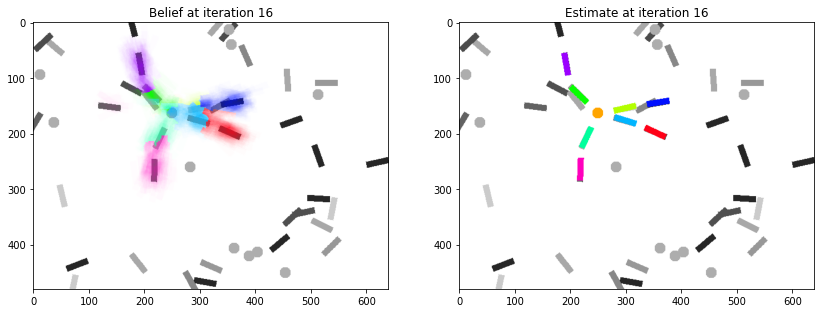

Running iteration: 17
IOU: 0.8755


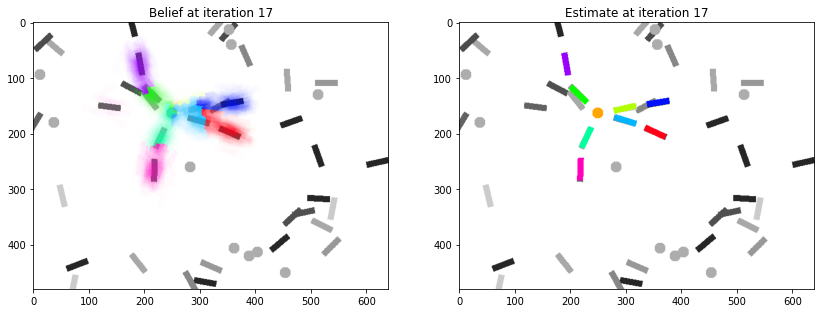

Running iteration: 18
IOU: 0.8642


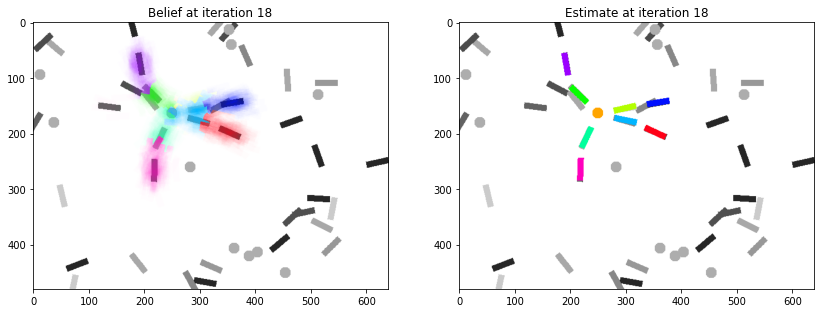

Running iteration: 19
IOU: 0.8690


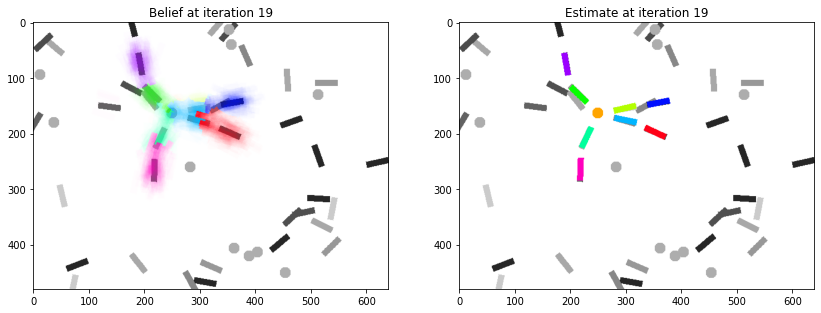

Running iteration: 20
IOU: 0.8824


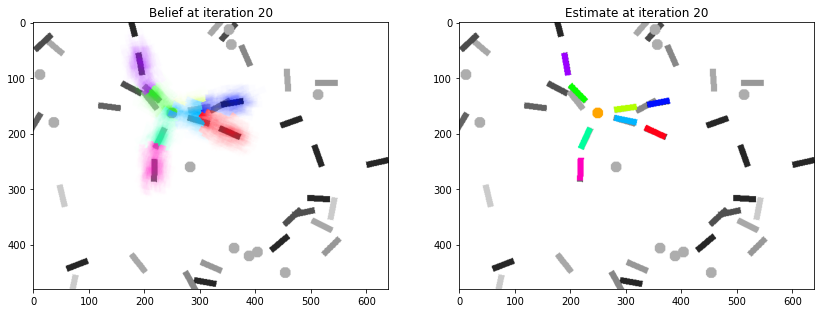

In [13]:
ious = run_inference(g, obs, N_ITERS, scene)

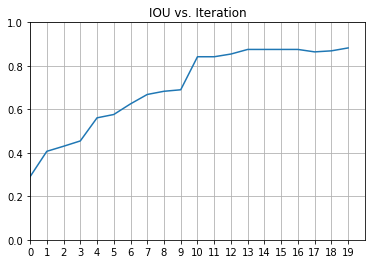

In [14]:
plt.figure()
plt.title("IOU vs. Iteration")
plt.ylim([0, 1])
plt.xlim([0, N_ITERS])
plt.xticks(np.arange(N_ITERS))
plt.grid()
plt.plot(np.arange(N_ITERS), ious)

## Max-Product BP

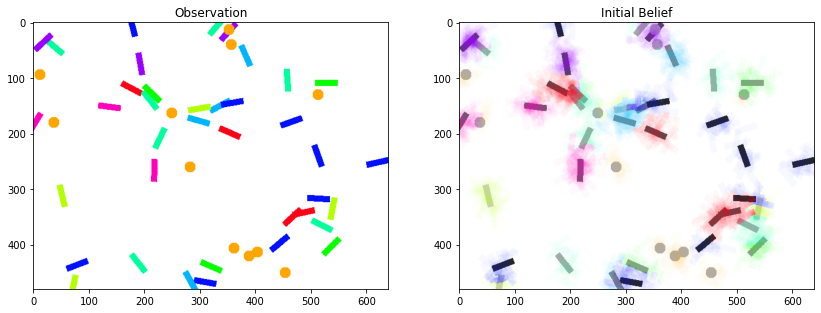

In [15]:
g.algo_type = graph.AlgoType.MAX_PRODUCT
g.init_obs(obs)
initial_bel = scene.display_belief(g.marginals(), img)

plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.title("Observation")
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title("Initial Belief")
plt.imshow(initial_bel)

Running iteration: 1
IOU: 0.3194


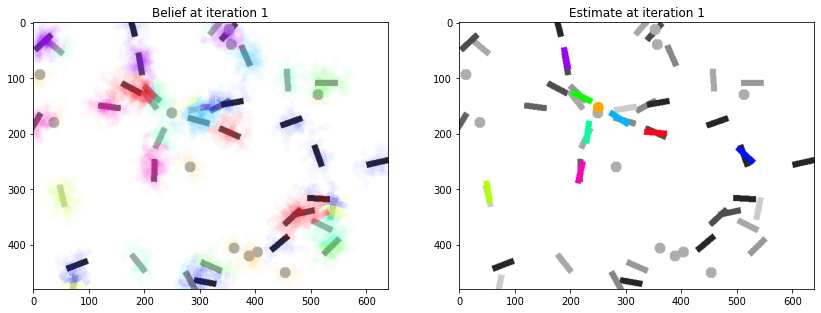

Running iteration: 2
IOU: 0.2012


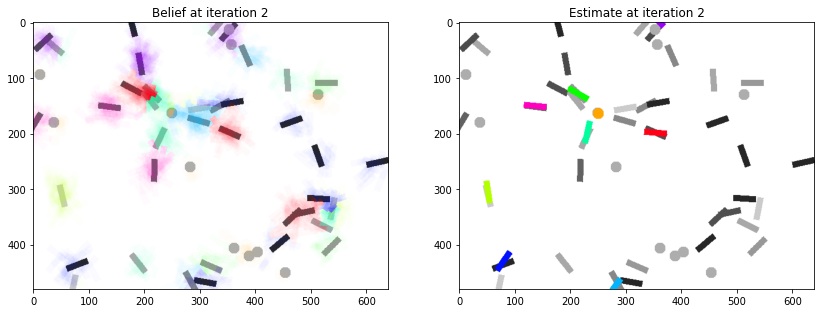

Running iteration: 3
IOU: 0.3425


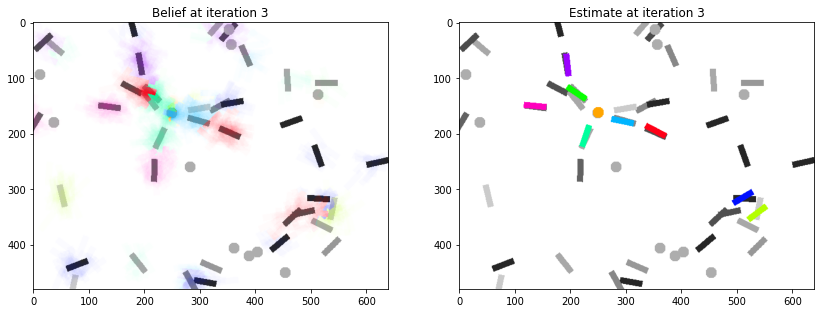

Running iteration: 4
IOU: 0.3204


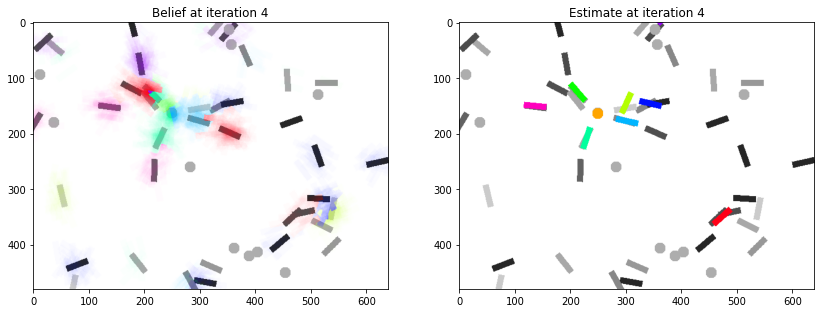

Running iteration: 5
IOU: 0.5438


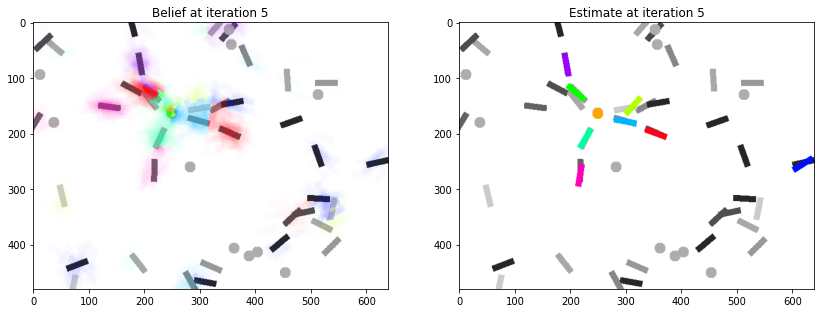

Running iteration: 6
IOU: 0.5837


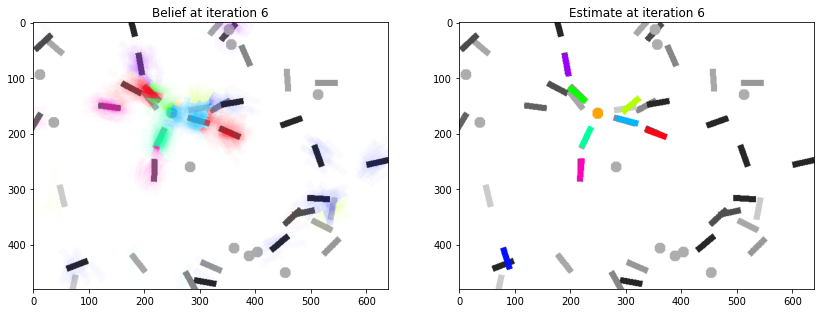

Running iteration: 7
IOU: 0.5835


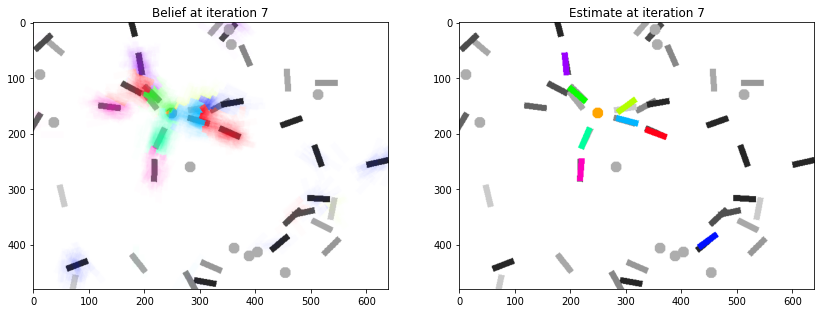

Running iteration: 8
IOU: 0.7356


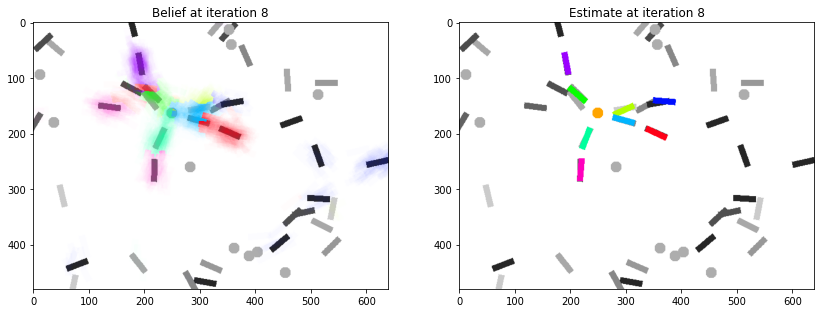

Running iteration: 9
IOU: 0.6376


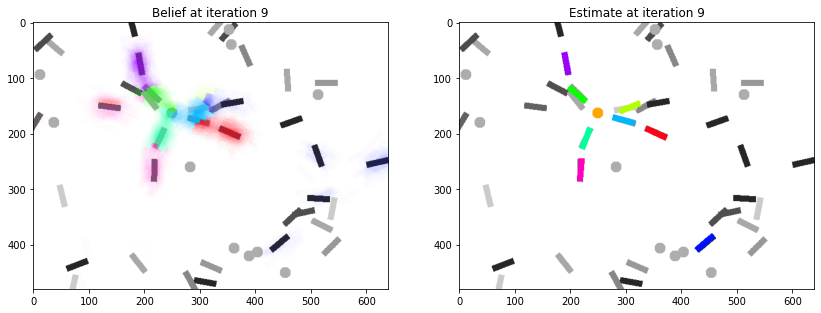

Running iteration: 10
IOU: 0.7783


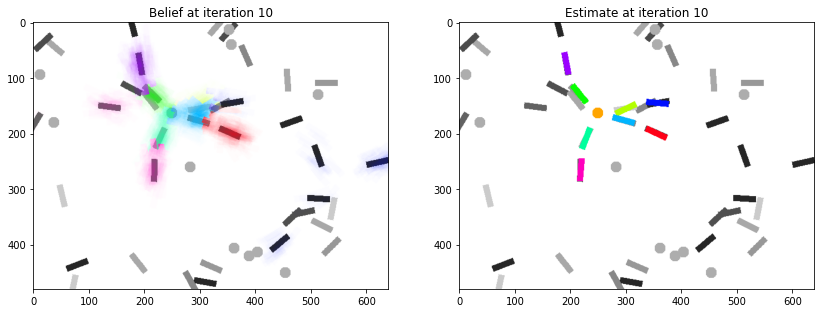

Running iteration: 11
IOU: 0.8063


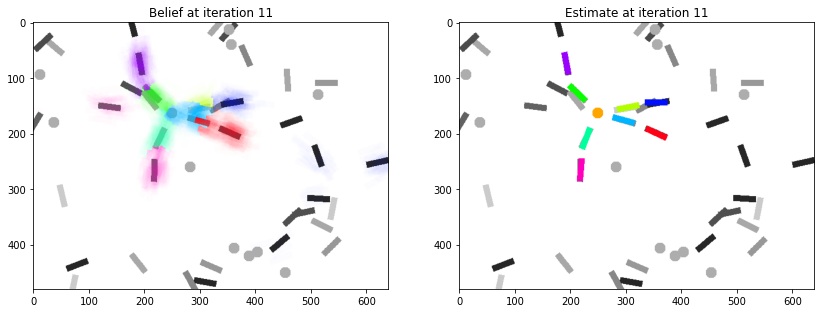

Running iteration: 12
IOU: 0.8200


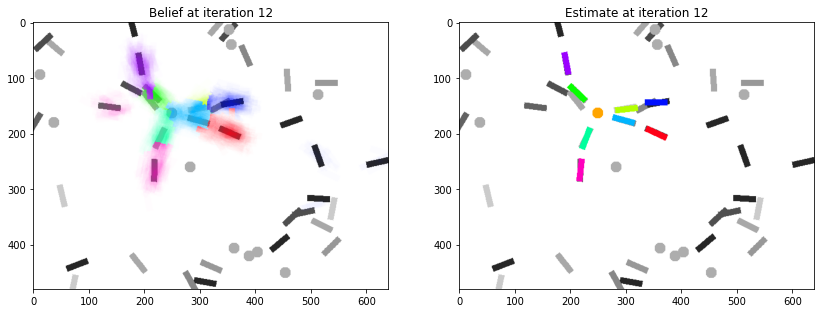

Running iteration: 13
IOU: 0.8630


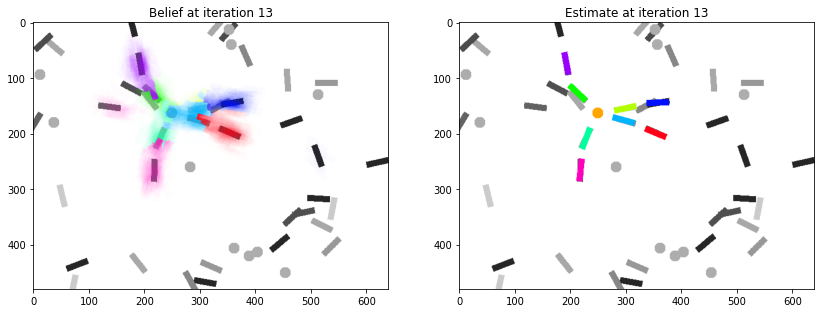

Running iteration: 14
IOU: 0.8635


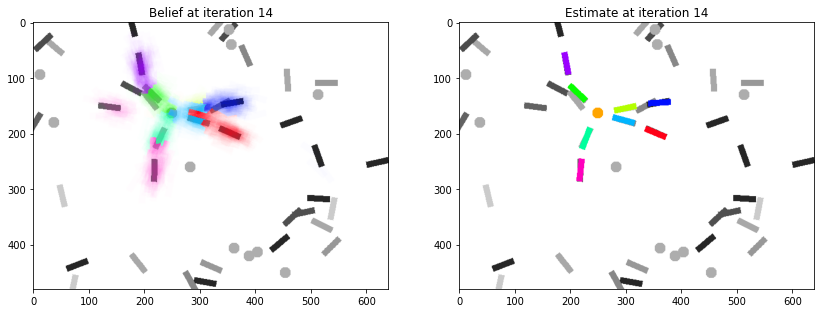

Running iteration: 15
IOU: 0.8811


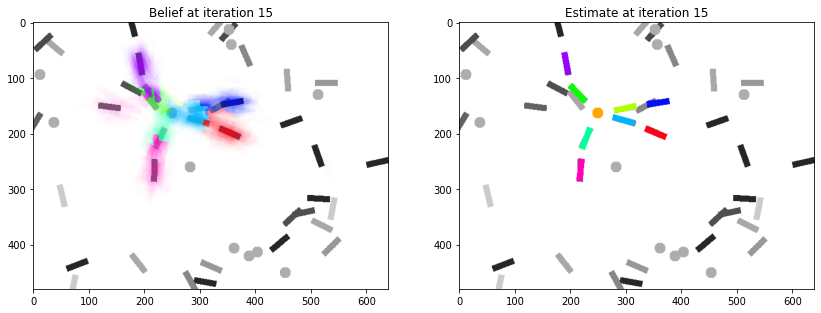

Running iteration: 16
IOU: 0.8811


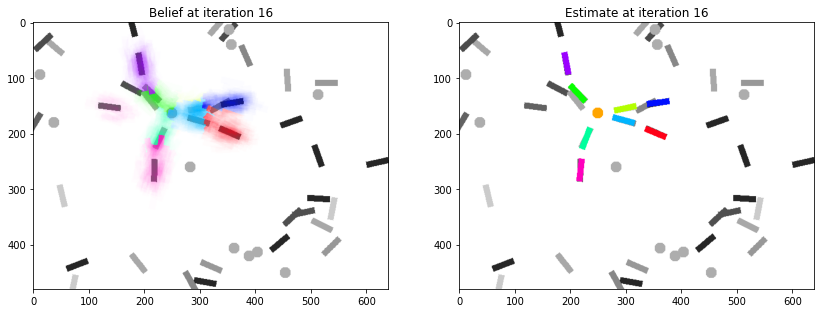

Running iteration: 17
IOU: 0.8862


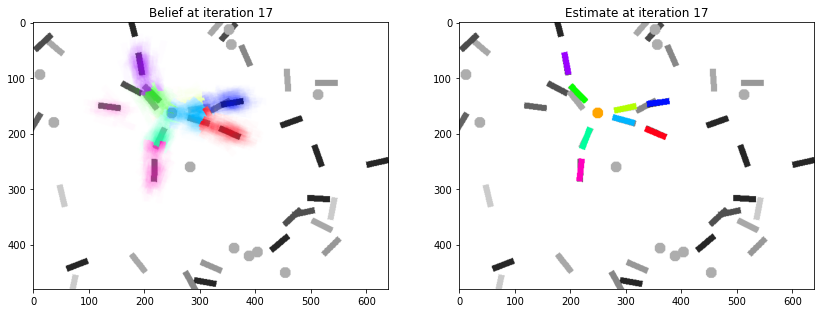

Running iteration: 18
IOU: 0.8862


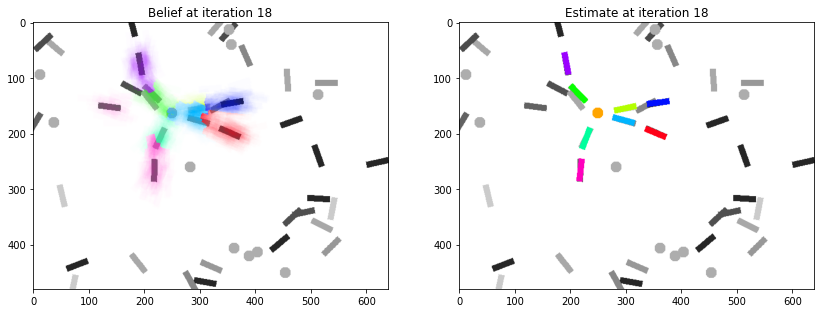

Running iteration: 19
IOU: 0.8862


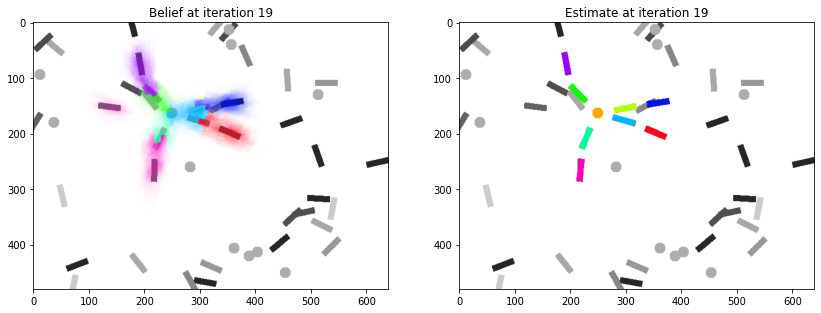

Running iteration: 20
IOU: 0.8862


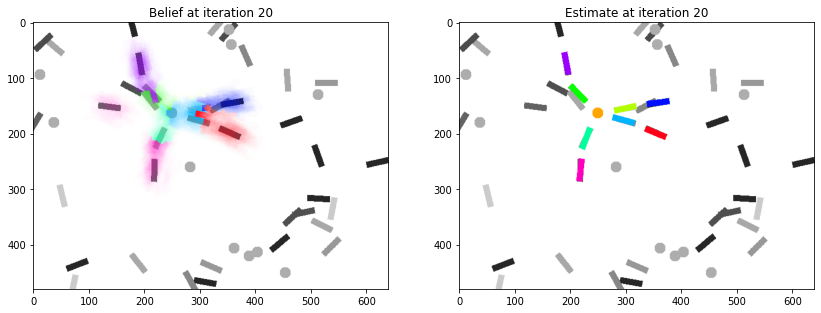

In [16]:
ious = run_inference(g, obs, N_ITERS, scene)

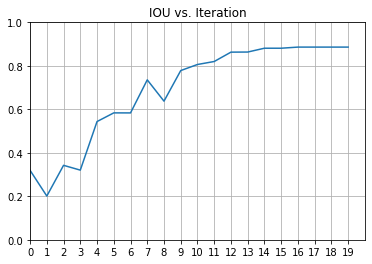

In [17]:
plt.figure()
plt.title("IOU vs. Iteration")
plt.ylim([0, 1])
plt.xlim([0, N_ITERS])
plt.xticks(np.arange(N_ITERS))
plt.grid()
plt.plot(np.arange(N_ITERS), ious)